In [1]:
from auto_drive_functions import retrieve_angle
from PIL import Image,ImageOps,ImageFilter
from ImageFrame import Frame
#import timeit as ti
#import numpy as np
#import matplotlib.pyplot as plt
from pylab import *
from EdgeFinderV2 import EdgeFinder as ef 

In [ ]:
x = np.array([[574 ,437],[ 64, 437],[580 ,331], [ 85, 347]])

plt.axis([0,640,480,0])
plt.plot(x[:,0],x[:,1],'k.')

In [2]:
frame1 = Frame(640,480,10)
#img = Image.open("image/img21.jpg")


load CVS file successfully


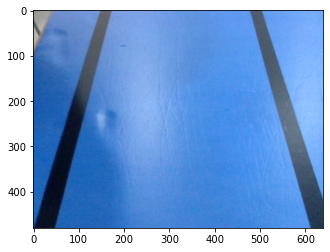

[[599 433]
 [ 60 436]
 [587 385]
 [ 72 392]
 [572 336]
 [ 84 346]]
-0.48925097428324454
[[329.5        434.5         11.79342968]
 [329.5        388.5          5.92750419]
 [328.         341.           3.29396499]]


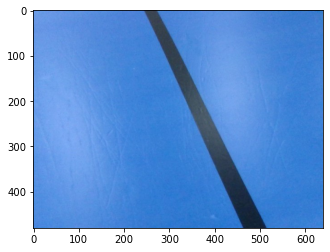

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [3]:
for i in range(20,27):
    img = Image.open("image/img"+str(i)+".jpg")
    imshow(img)
    plt.show()
    points, midpoint, angle = retrieve_angle(50,3,15,2,img,frame1)
    print(midpoint)

In [ ]:
print(angle)

In [ ]:
img = Image.open("image/img21.jpg")
data = frame1.get_data(img,2)
edge = ef(50,3,15,data)


In [ ]:
points = np.empty([0,2],int)
for i in range(0,4,2):
    if edge.BND[i] != 0 and edge.BND[i+1]!=0 : 
        points= np.append(points,[frame1.fline[str(i+1)][int(edge.BND[i])]],axis=0)
        points= np.append(points,[frame1.fline[str(i+2)][int(edge.BND[i+1])]],axis=0)

print(points.shape)



In [ ]:
points = np.array([frame1.fline[key][int(edge.BND[int(key)-1])] for key in frame1.fline.keys() if edge.BND[int(key)-1]!=0])[0:4]
points

In [ ]:
points[0]
points[2]-points[0]

In [ ]:

imshow(img)
for key in frame1.fline.keys():
    plt.plot(frame1.fline[key][:,0],frame1.fline[key][:,1],'k:')
    plt.plot(points[:,0],points[:,1],'ro')